<h3><b>Undersampling/Oversampling regression - White wine data case scenero<b></h3>

In [117]:
# Importing the necessary Python modules
# pip install imbalanced-learn 
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
pd.set_option('display.float_format', '{:.2f}'.format)

# Then load the data for analysis
# I wouldn't want drop any variable because its already 
# a cleaned dataset
df = pd.read_csv("white_wine_cleaned.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,6
4894,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,5
4895,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,6
4896,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,7


<Axes: xlabel='quality', ylabel='Count'>

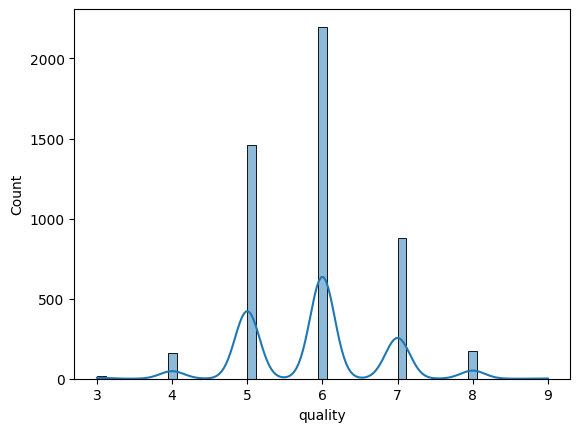

In [118]:
# There are 4898 rows data pretty much I would say
# histogram to see the distribution of target variable
# Here the data target variable is 'quality'
# There are obviously outliers in the data
# And there is classification in the target variable
# that are overly represented 
# such as 5 and 6
# I would say 5 and 7 are skewed left (distribution)
# While 6 is pretty well normal 
sns.histplot(data=df, x="quality", kde=True)

<h3>Next step for me would be to remove the Outliers in the data</h3>

In [119]:
# Objective here is get a normal distribution
# As shown above distribution is quite left-skewed heavily

# Removing the outliers is necessary for my model
# perhaps making comparism variables to each other instead
# of focusing on outliers on a single variable
from sklearn.ensemble import IsolationForest

# adjust the contamination rate as you see fit
# In this data case I would use 0.1
# which would be 10% outliers and 90% inliers
# because I want majority of the 
# outliers to be removed 
# As this will be helpful to build an efficient model 
# for example, if you expect 5% of the data to be outliers
# you can use 0.05 etc. 
iso = IsolationForest(contamination=0.1) 

# fit isolation forest
y_pred = iso.fit_predict(df)

# filter outliers only
outliers = df[y_pred != 1]
df_cleaned = df.drop(outliers.index)

# Display the number of rows before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Outliers shape: {outliers.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Original dataset shape: (4898, 12)
Outliers shape: (490, 12)
Cleaned dataset shape: (4408, 12)


In [120]:
# I noticed each time the Isolation Forest model 
# detect different numbers of rows as outliers
# I think its due to the stochastic nature of the algorithm
# and possible changes in contamination. 
# which I use 0.05 at some point 
# data (df) has 4558 rows 12 coulmns
# detect 340 outliers
outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
7,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
14,8.30,0.42,0.62,19.25,0.04,41.00,172.00,1.00,2.98,0.67,9.70,5
17,6.20,0.66,0.48,1.20,0.03,29.00,75.00,0.99,3.33,0.39,12.80,8
20,6.20,0.66,0.48,1.20,0.03,29.00,75.00,0.99,3.33,0.39,12.80,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4847,4.40,0.54,0.09,5.10,0.04,52.00,97.00,0.99,3.41,0.40,12.20,7
4867,5.30,0.60,0.34,1.40,0.03,3.00,60.00,0.99,3.27,0.38,13.00,6
4877,5.90,0.54,0.00,0.80,0.03,12.00,82.00,0.99,3.25,0.36,8.80,5
4878,6.20,0.53,0.02,0.90,0.04,6.00,81.00,0.99,3.24,0.35,9.50,4


<Axes: xlabel='quality', ylabel='Count'>

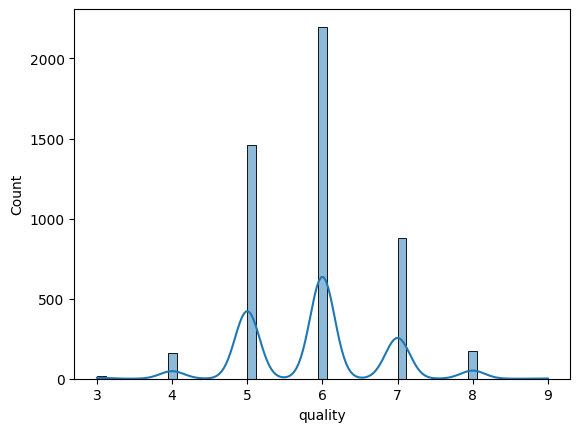

In [121]:
# Now using the histogram 
# to see the distribution of target variable
sns.histplot(data=df, x="quality", kde=True)

<h3>At this point I think more outliers perhaps need to be removed</h3>
<ul>
<li>It shown that the class 'quality' 5 is normal</li>
<li>And now class 6 skewed left</li>
<li>While 7 is right skewed</li>
</ul>

In [122]:
import numpy as np
import pandas as pd

# load dataset
variable = "quality"

# Calculate Q1 and Q3, adjust for a more subtle outlier detection
# and target the top 30% of the quantile (0.7)
Q1 = df[variable].quantile(0.25)
Q3 = df[variable].quantile(0.7)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
df = df.drop(outliers.index)

print(f"Number of outliers removed: {len(outliers)}")
print("Updated DataFrame shape:", df.shape)

Number of outliers removed: 200
Updated DataFrame shape: (4698, 12)


In [123]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4698.00,4698.00,4698.00,4698.00,4698.00,4698.00,4698.00,4698.00,4698.00,4698.00,4698.00,4698.00
mean,6.86,0.28,0.33,6.42,0.05,35.18,138.70,0.99,3.19,0.49,10.47,5.81
std,0.84,0.10,0.12,5.10,0.02,16.45,42.25,0.00,0.15,0.11,1.21,0.77
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,4.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,109.00,0.99,3.08,0.41,9.40,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,135.00,0.99,3.18,0.48,10.30,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,168.00,1.00,3.28,0.55,11.30,6.00
max,14.20,1.10,1.66,65.80,0.35,138.50,344.00,1.04,3.82,1.08,14.20,7.00


In [124]:
df.var()

fixed acidity             0.70
volatile acidity          0.01
citric acid               0.01
residual sugar           26.00
chlorides                 0.00
free sulfur dioxide     270.71
total sulfur dioxide   1784.71
density                   0.00
pH                        0.02
sulphates                 0.01
alcohol                   1.46
quality                   0.60
dtype: float64

In [125]:
# checking the correlation before resampled
# 'alcohol' a positive correlation with quality (0.43)
# meaning with the value, it is linked to a better quality wines.
# 'density'has a moderate negative correlation with quality (-0.30),
# indicating that wines with lower density tend to have higher quality.
# same goes to 'chloride' (-0.28) tend to have a good quality wines
# total sulfur dioxide: Has a weak negative correlation (-0.23) with quality,
# implying that lower sulfur dioxide levels slightly correspond with higher quality.
# However, fixed acidity, citric acid, free sulfur dioxide, sulphates:
# they have near-zero correlations with quality, 
# indicating that they have little to no direct association with wine quality in this dataset.
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.02,0.29,0.08,0.01,-0.05,0.09,0.25,-0.42,-0.01,-0.10,-0.10
volatile acidity,-0.02,1.00,-0.15,0.07,0.07,-0.10,0.09,0.04,-0.03,-0.03,0.05,-0.22
citric acid,0.29,-0.15,1.00,0.10,0.12,0.11,0.13,0.15,-0.17,0.07,-0.08,-0.01
residual sugar,0.08,0.07,0.10,1.00,0.08,0.32,0.41,0.84,-0.18,-0.02,-0.45,-0.10
chlorides,0.01,0.07,0.12,0.08,1.00,0.11,0.19,0.25,-0.08,0.01,-0.35,-0.20
free sulfur dioxide,-0.05,-0.10,0.11,0.32,0.11,1.00,0.61,0.32,-0.01,0.05,-0.27,0.02
total sulfur dioxide,0.09,0.09,0.13,0.41,0.19,0.61,1.00,0.53,0.01,0.14,-0.45,-0.17
density,0.25,0.04,0.15,0.84,0.25,0.32,0.53,1.00,-0.08,0.08,-0.77,-0.30
pH,-0.42,-0.03,-0.17,-0.18,-0.08,-0.01,0.01,-0.08,1.00,0.15,0.11,0.09
sulphates,-0.01,-0.03,0.07,-0.02,0.01,0.05,0.14,0.08,0.15,1.00,-0.02,0.07


In [126]:
outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.20,0.66,0.48,1.20,0.03,29.00,75.00,0.99,3.33,0.39,12.80,8
20,6.20,0.66,0.48,1.20,0.03,29.00,75.00,0.99,3.33,0.39,12.80,8
22,6.80,0.26,0.42,1.70,0.05,41.00,122.00,0.99,3.47,0.48,10.50,8
68,6.70,0.23,0.31,2.10,0.05,30.00,96.00,0.99,3.33,0.64,10.70,8
74,6.70,0.23,0.31,2.10,0.05,30.00,96.00,0.99,3.33,0.64,10.70,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4765,5.20,0.30,0.34,1.50,0.04,18.00,96.00,0.99,3.56,0.48,13.00,8
4766,6.40,0.32,0.25,5.00,0.06,28.00,138.00,0.99,3.27,0.50,12.40,8
4786,4.40,0.32,0.39,4.30,0.03,31.00,127.00,0.99,3.46,0.36,12.80,8
4787,3.90,0.23,0.40,4.20,0.03,29.00,118.00,0.99,3.57,0.36,12.80,8


In [127]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,6
4894,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,5
4895,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,6
4896,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,7


<h4>Now checking how the distribution would be after outliers further removed</h4>

<Axes: xlabel='quality', ylabel='Count'>

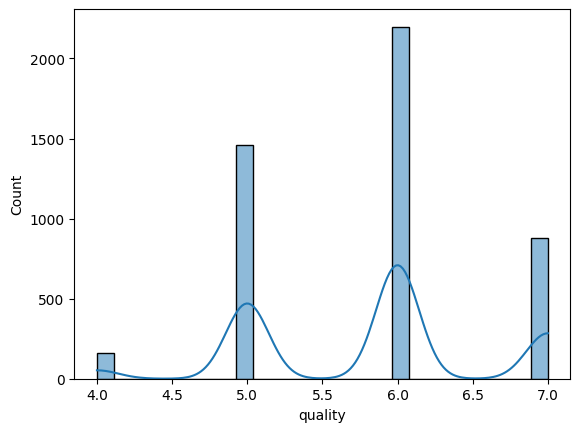

In [128]:
# The distribution is quite normal now
# The class 6 is more represented still
# as well as 5
# Class 7 and beyond I would say they well represented
sns.histplot(data=df, x="quality", kde=True)

In [129]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,6
4894,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,5
4895,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,6
4896,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,7


<h4>Udersampling for regression</h4>

In [130]:
print(df['quality'].unique())


[6 5 7 4]


In [147]:
target = "quality"
df['target_binned'] = pd.cut(df[target], bins=6, labels=False)

<Axes: xlabel='target_binned', ylabel='Count'>

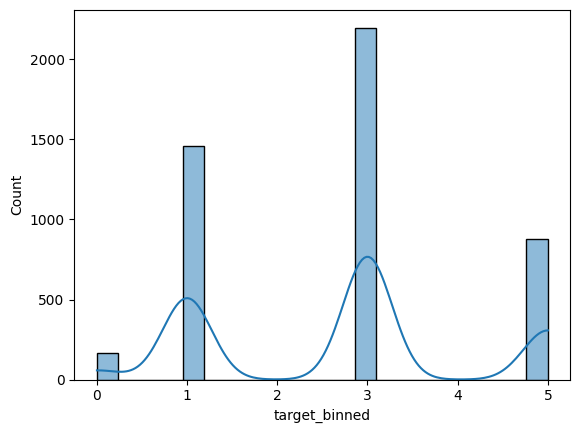

In [ ]:
# The binned version for the target 'quality'
# I think the reason for the missing/gap in the
# target_binned was because of the few class 
# in the target variable 'quality'uniqueness values
# [6 5 7 4]
# So for the 'quality' values to be well represented
# I choose 6 bins 
sns.histplot(data=df, x="target_binned", kde=True)




In [133]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target_binned
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6,3
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6,3
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6,3
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,3
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,6,3
4894,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,5,1
4895,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,6,3
4896,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,7,5


In [134]:
# this line of code gives the exact 
# value of counts, of each bin
# when using sampling strategy
df['target_binned'].value_counts()

target_binned
3    2198
1    1457
5     880
0     163
Name: count, dtype: int64

<h4>Since the data distribution of the target_binned variable seems to be left-skewed. Which I think, it is because the majority of samples fall into higher bins (bins 3 and 1), while the lower bin (bin 0) has significantly fewer samples, indicating a heavier tail on the left side of the distribution.</h4>

<h4>So, in other to balance, I reduce the bins 1 and 3 by setting the samples to smaller but balanced counts helps in avoiding dominance of these bins in the model.</h4>
<h4>And since bins 0 and 5 have fewer samples, there is need to set it to specific number that ensures they are still represented without overwhelming the dataset with too few samples.</h4>


In [135]:
# Setting custom for Undersampling strategy
# Set bin 0 to 100 samples
# Set bin 1 to 400 samples
# Set bin 3 to 800 samples
# Set bin 5 to 400 samples
strategy = {
    0: 100,   
    1: 400,   
    3: 800,  
    5: 400,  
}


In [136]:
# Now optimizing the data
# since its the optimizing data, 
# then using the binned-version would be nice
# as the "target variable"
variables = df.drop('target_binned', axis=1).columns
X = df[variables]
y = df['target_binned']

# initialize the undersampling sampler
# strategy = {0: 200, 1: 400, 2: 800, 3: 1200, 4: 1100, 5: 800, 6: 280, 7: 100}
sampler = RandomUnderSampler(sampling_strategy=strategy, random_state=321)

# perform undersampling
X_resampled, y_resampled = sampler.fit_resample(X, y)

# reconstruct the dataframe
df_resampled = pd.DataFrame(X_resampled, columns=variables)
df_resampled['target_binned'] = y_resampled

In [137]:
# below showed there is still more data to be used
df_resampled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target_binned
1042,7.30,0.49,0.32,5.20,0.04,18.00,104.00,1.00,3.24,0.45,10.70,4,0
1040,8.20,0.68,0.30,2.10,0.05,17.00,138.00,0.99,3.22,0.71,10.80,4,0
178,6.00,0.67,0.07,1.20,0.06,9.00,108.00,0.99,3.11,0.35,8.70,4,0
687,6.80,0.67,0.30,13.00,0.29,22.00,193.00,1.00,3.08,0.67,9.00,4,0
1652,8.20,0.29,0.49,1.00,0.04,29.00,118.00,0.99,3.24,0.36,10.90,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3155,6.80,0.39,0.34,7.40,0.02,38.00,133.00,0.99,3.18,0.44,12.00,7,5
1684,7.30,0.26,0.33,17.85,0.05,41.50,195.00,1.00,3.06,0.44,9.10,7,5
1201,7.00,0.17,0.37,1.50,0.03,26.00,75.00,0.99,3.30,0.46,10.80,7,5
4170,7.40,0.16,0.30,13.70,0.06,33.00,168.00,1.00,2.90,0.44,8.70,7,5


<Axes: xlabel='quality', ylabel='Count'>

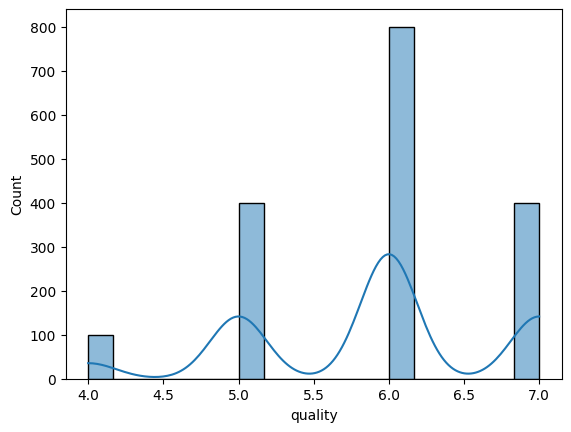

In [138]:
# the distribution is much closer to normal distribution
sns.histplot(data=df_resampled, x="quality", kde=True)

<h4>Now, comparing the stats with each other if the dataset close to the original dataset</h4>

In [139]:
df_resampled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target_binned
count,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00,1700.00
mean,6.82,0.28,0.33,6.27,0.05,34.61,135.73,0.99,3.19,0.49,10.54,5.88,2.82
std,0.81,0.10,0.12,5.01,0.02,16.77,41.63,0.00,0.15,0.11,1.24,0.83,1.54
min,4.70,0.08,0.00,0.70,0.01,3.00,10.00,0.99,2.74,0.22,8.40,4.00,0.00
25%,6.30,0.21,0.27,1.70,0.04,22.00,106.00,0.99,3.09,0.40,9.40,5.00,1.00
50%,6.80,0.26,0.31,4.90,0.04,33.00,132.00,0.99,3.18,0.47,10.40,6.00,3.00
75%,7.30,0.32,0.38,9.70,0.05,45.00,164.00,1.00,3.29,0.55,11.40,6.00,3.00
max,10.20,1.10,1.00,31.60,0.29,138.50,313.00,1.01,3.80,1.08,14.20,7.00,5.00


In [140]:
# the difference not really much
# total sulfur dioxide have quite high difference
# before df.var() (1784.71) and resampled.var() (1733.02)
# a good relief for the data I would say
# alcohol increases by slight low 0.08
# target variable increases by 0.09 which is quite low
# and free sulfur dioxide increases by value 10.48
df_resampled.var()

fixed acidity             0.66
volatile acidity          0.01
citric acid               0.01
residual sugar           25.08
chlorides                 0.00
free sulfur dioxide     281.19
total sulfur dioxide   1733.02
density                   0.00
pH                        0.02
sulphates                 0.01
alcohol                   1.54
quality                   0.69
target_binned             2.38
dtype: float64

In [141]:
# I will compare the two correlations
# after comparism I found out 
# there is just quite slight changes 
# volatile acidity from -0.22 to -0.24,
# fixed acidity from -0.10 to -0.09,
# citric acide from -0.01 to -0.03
# Basically, all other variables change slightly
# only 'alcohol', 'density' and 'quality' remain same
df_resampled.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target_binned
fixed acidity,1.00,-0.04,0.29,0.09,0.02,-0.03,0.07,0.26,-0.44,-0.00,-0.12,-0.09,-0.09
volatile acidity,-0.04,1.00,-0.17,0.01,0.06,-0.15,0.04,-0.02,-0.05,-0.05,0.08,-0.24,-0.22
citric acid,0.29,-0.17,1.00,0.08,0.12,0.13,0.13,0.13,-0.15,0.05,-0.07,0.03,0.02
residual sugar,0.09,0.01,0.08,1.00,0.09,0.31,0.39,0.84,-0.17,-0.04,-0.44,-0.08,-0.10
chlorides,0.02,0.06,0.12,0.09,1.00,0.13,0.23,0.27,-0.10,0.02,-0.38,-0.22,-0.22
free sulfur dioxide,-0.03,-0.15,0.13,0.31,0.13,1.00,0.61,0.31,0.03,0.03,-0.24,0.07,0.05
total sulfur dioxide,0.07,0.04,0.13,0.39,0.23,0.61,1.00,0.53,0.03,0.15,-0.44,-0.09,-0.11
density,0.26,-0.02,0.13,0.84,0.27,0.31,0.53,1.00,-0.08,0.06,-0.79,-0.28,-0.30
pH,-0.44,-0.05,-0.15,-0.17,-0.10,0.03,0.03,-0.08,1.00,0.18,0.11,0.12,0.13
sulphates,-0.00,-0.05,0.05,-0.04,0.02,0.03,0.15,0.06,0.18,1.00,-0.01,0.08,0.09


<h4>Observations</h4>
<ul>
<li>Generally, the correlations in both the original and resampled data show similar patterns, with a few changes due to resampling.</li>
<li>I noticed that the correlation between alcohol and density with quality and target_binned remains strong but has slightly weakened. </li>
<li>Also, volatile acidity shows a slightly stronger negative correlation with quality after resampling.</li>
<li>Which shows that the undersampling strategy influenced feature interactions subtly. </li>
<li>However, still preserved the overall relationship structure.</li>
</ul>
